In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

%matplotlib inline

In [2]:
threads = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def read_data(test_name: str) -> pd.DataFrame:
    results_files = [f"../jmeter/results-{test_name}-1000-{i}-1.jtl" for i in threads]
    li = []
    for i, filename in enumerate(results_files):
        df_new = pd.read_csv(filename, index_col=None, header=0)
        df_new["Threads"] = threads[i]
        li.append(df_new)

    return pd.concat(li, axis=0, ignore_index=True)


### Load Test A: GET /api/movie/list and GET /api/movie/list/{correlationId}

In [3]:
dfa = read_data("a")
dfa.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650653465040,60,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,60.0,0.0,16.0,10
1,1650653465110,14,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/0a4edd53-...,14.0,0.0,0.0,10
2,1650653465099,31,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,31.0,0.0,1.0,10
3,1650653465124,8,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,8.0,0.0,0.0,10
4,1650653465131,19,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/19ed5259-...,19.0,0.0,0.0,10


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052387 entries, 0 to 1052386
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timeStamp        1052387 non-null  int64  
 1   elapsed          1052387 non-null  int64  
 2   label            1052387 non-null  object 
 3   responseCode     1052387 non-null  int64  
 4   responseMessage  0 non-null        float64
 5   threadName       1052387 non-null  object 
 6   dataType         1052387 non-null  object 
 7   success          1052387 non-null  bool   
 8   failureMessage   0 non-null        float64
 9   bytes            1052387 non-null  int64  
 10  sentBytes        1052387 non-null  int64  
 11  grpThreads       1052387 non-null  int64  
 12  allThreads       1052387 non-null  int64  
 13  URL              1052387 non-null  object 
 14  Latency          1052386 non-null  float64
 15  IdleTime         1052386 non-null  float64
 16  Connect          1

In [5]:
dfa_by_threads = dfa.groupby("Threads").mean()
dfa_by_threads

,timeStamp,elapsed,responseCode,responseMessage,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,,
10,1.650653e+12,10.372350,204.530000,NaN,0.984900,NaN,677.613600,148.500000,9.823250,9.823250,10.289300,0.0,0.006300
20,1.650654e+12,15.564225,205.527500,NaN,0.981575,NaN,671.360450,148.500000,19.654325,19.654325,15.501500,0.0,0.005725
30,1.650654e+12,23.565567,205.855000,NaN,0.980483,NaN,669.900050,148.500000,29.642300,29.642300,23.501467,0.0,0.006967
40,1.650654e+12,28.696051,208.827616,NaN,0.970575,NaN,658.908482,148.482292,39.496928,39.496928,28.638331,0.0,0.011023
50,1.650654e+12,34.660980,209.291000,NaN,0.969030,NaN,657.878290,148.500000,49.364720,49.364720,34.613660,0.0,0.009460
60,1.650654e+12,43.204950,204.430000,NaN,0.985233,NaN,674.758617,148.500000,59.513717,59.513717,43.152933,0.0,0.005733
70,1.650655e+12,46.893300,203.132857,NaN,0.989557,NaN,679.119443,148.500000,69.490093,69.490093,46.848093,0.0,0.004793
80,1.650655e+12,52.497400,205.919375,NaN,0.980269,NaN,671.880369,148.500000,79.407675,79.407675,52.458494,0.0,0.007756
90,1.650655e+12,58.728711,208.998333,NaN,0.970006,NaN,655.063844,148.500000,89.279522,89.279522,58.691661,0.0,0.010383


In [6]:
dfa.groupby("Threads")["responseCode"].value_counts()

Threads  responseCode
10       200              19698
         500                302
20       200              39263
         500                737
30       200              58829
         500               1171
40       200              31434
         500                953
50       200              96903
         500               3097
60       200             118228
         500               1772
70       200             138538
         500               1462
80       200             156843
         500               3157
90       200             174601
         500               5399
100      200             198543
         500               1457
Name: responseCode, dtype: int64

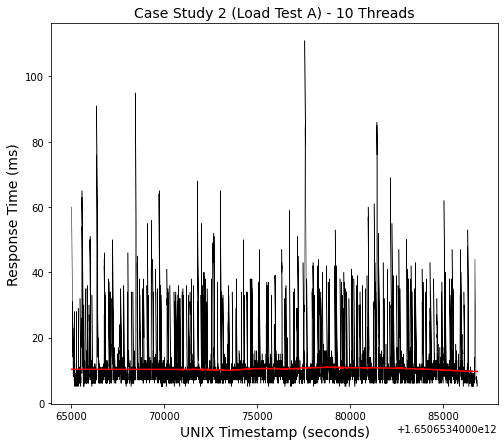

In [7]:
plt.figure(figsize=(8, 7))
t = 10
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 2 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

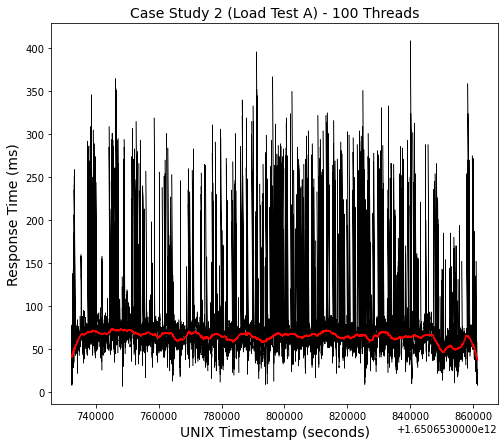

In [8]:
plt.figure(figsize=(8, 7))
t = 100
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 2 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

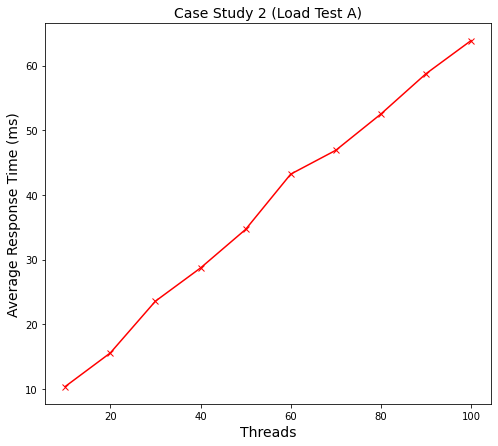

		Pearson correlation = 0.998


In [9]:
plt.figure(figsize=(8, 7))
x = dfa_by_threads.index
y = dfa_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 2 (Load Test A)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (ms)", fontsize=14)
plt.show()

print(f"\t\tPearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}")

### Load Test B: POST /api/cinema/cineworld/reservation/make and GET /api/cinema/cineworld/reservation/make/{correlationId}

In [10]:
dfb = read_data("b")
dfb.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650656649490,68,POST Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,190,457,2,2,http://localhost:8099/api/cinema/cineworld/res...,68,0,25,10
1,1650656649553,27,POST Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,190,457,2,2,http://localhost:8099/api/cinema/cineworld/res...,27,0,0,10
2,1650656649568,12,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,334,190,2,2,http://localhost:8099/api/cinema/cineworld/res...,12,0,0,10
3,1650656649580,8,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,334,190,2,2,http://localhost:8099/api/cinema/cineworld/res...,8,0,0,10
4,1650656649581,9,POST Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,190,457,2,2,http://localhost:8099/api/cinema/cineworld/res...,9,0,0,10


In [11]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timeStamp        1100000 non-null  int64  
 1   elapsed          1100000 non-null  int64  
 2   label            1100000 non-null  object 
 3   responseCode     1100000 non-null  int64  
 4   responseMessage  0 non-null        float64
 5   threadName       1100000 non-null  object 
 6   dataType         1100000 non-null  object 
 7   success          1100000 non-null  bool   
 8   failureMessage   0 non-null        float64
 9   bytes            1100000 non-null  int64  
 10  sentBytes        1100000 non-null  int64  
 11  grpThreads       1100000 non-null  int64  
 12  allThreads       1100000 non-null  int64  
 13  URL              1100000 non-null  object 
 14  Latency          1100000 non-null  int64  
 15  IdleTime         1100000 non-null  int64  
 16  Connect          1

In [12]:
dfb_by_threads = dfb.groupby("Threads").mean()
dfb_by_threads

,timeStamp,elapsed,responseCode,responseMessage,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,,
10,1.650657e+12,12.184950,205.445000,NaN,0.981850,NaN,261.662500,323.5,9.856300,9.856300,12.064950,0.0,0.009450
20,1.650657e+12,17.208875,206.367500,NaN,0.978775,NaN,261.627250,323.5,19.763900,19.763900,17.130450,0.0,0.008400
30,1.650656e+12,25.725083,209.015000,NaN,0.969950,NaN,261.513967,323.5,29.666767,29.666767,25.639900,0.0,0.011850
40,1.650656e+12,32.572237,210.353750,NaN,0.965488,NaN,261.469625,323.5,39.552000,39.552000,32.498325,0.0,0.012762
50,1.650656e+12,38.298200,210.203000,NaN,0.965990,NaN,261.474190,323.5,49.445540,49.445540,38.231740,0.0,0.012950
60,1.650656e+12,43.035825,208.527500,NaN,0.971575,NaN,261.529642,323.5,59.411883,59.411883,42.972642,0.0,0.010000
70,1.650656e+12,48.061443,208.607857,NaN,0.971307,NaN,261.533357,323.5,69.458421,69.458421,48.006621,0.0,0.009964
80,1.650656e+12,55.969006,210.721250,NaN,0.964263,NaN,261.433669,323.5,79.419381,79.419381,55.917325,0.0,0.011888
90,1.650655e+12,58.930539,208.610000,NaN,0.971300,NaN,261.507956,323.5,89.391150,89.391150,58.883544,0.0,0.010006


In [13]:
dfb.groupby("Threads")["responseCode"].value_counts()

Threads  responseCode
10       200              19637
         500                363
20       200              39151
         500                849
30       200              58197
         500               1803
40       200              77239
         500               2761
50       200              96599
         500               3401
60       200             116589
         500               3411
70       200             135983
         500               4017
80       200             154282
         500               5718
90       200             174834
         500               5166
100      200             192662
         500               7338
Name: responseCode, dtype: int64

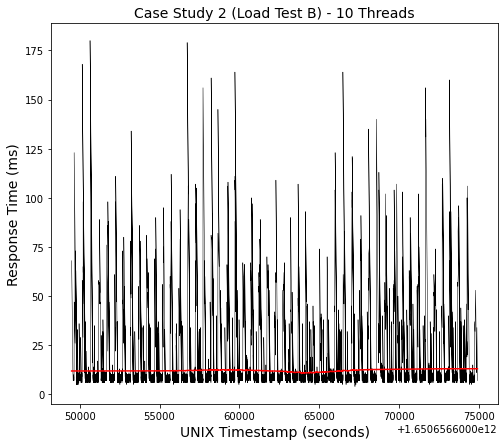

In [14]:
plt.figure(figsize=(8, 7))
t = 10
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 2 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

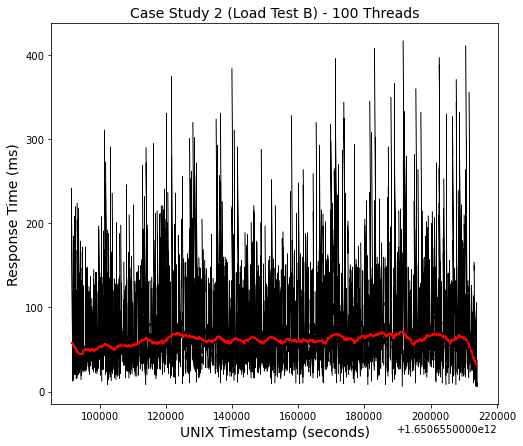

In [15]:
plt.figure(figsize=(8, 7))
t = 100
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.5)
plt.plot(x, savgol_filter(y, 10000, 2), color="red")
plt.title(f"Case Study 2 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("UNIX Timestamp (seconds)", fontsize=14)
plt.ylabel("Response Time (ms)", fontsize=14)
plt.show()

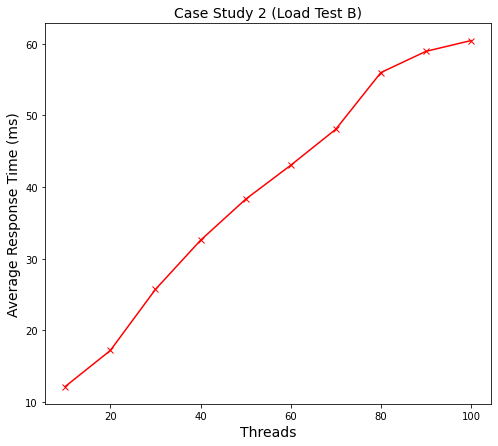

		Pearson correlation = 0.992


In [16]:
plt.figure(figsize=(8, 7))
x = dfb_by_threads.index
y = dfb_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 2 (Load Test B)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (ms)", fontsize=14)
plt.show()

print(f"\t\tPearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}")